### Image Segementation ve Watershed Algorithm

---

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

#### Görev: Fotoğraftaki metal paraların şeklini çizmek.

-----------------

#### Naive Yaklaşımı

#### Örnek Fotoğraf

In [5]:
sep_coins = cv2.imread('Data/coin.jpg')

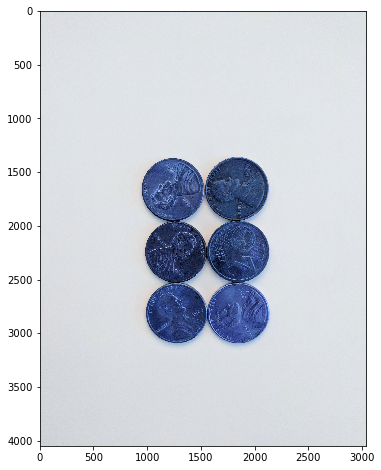

In [6]:
display(sep_coins)

#### Median Blurring Uygulanması

In [7]:
sep_blur = cv2.medianBlur(sep_coins,25)

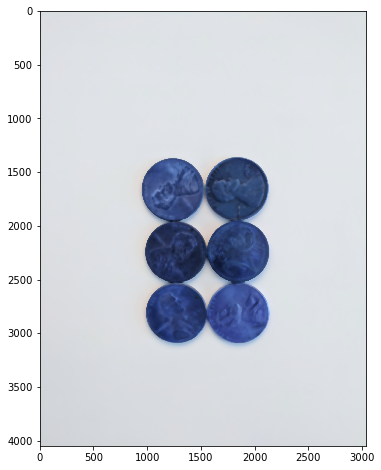

In [8]:
display(sep_blur)

In [9]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

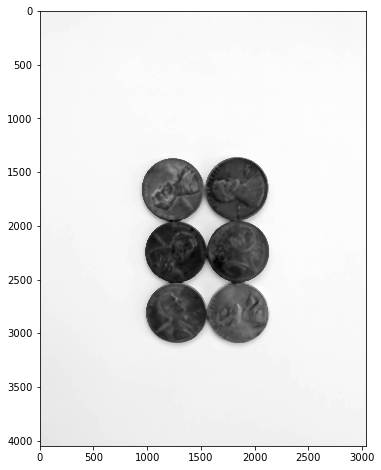

In [10]:
display(gray_sep_coins,cmap='gray')

#### Binary Threshold

In [11]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

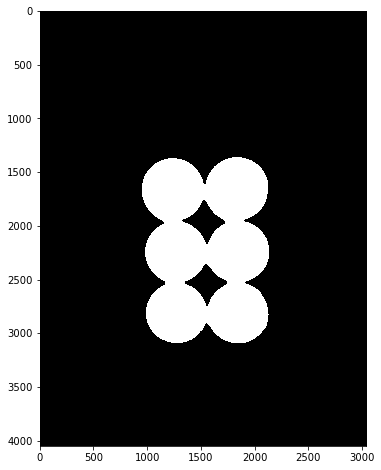

In [12]:
display(sep_thresh,cmap='gray')

#### Find Contours

In [13]:
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

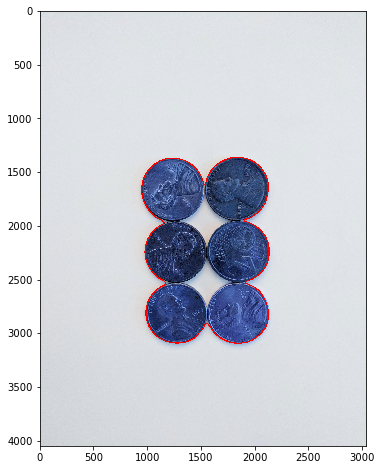

In [15]:
display(sep_coins)

#### Watershed Algoritması

-----------

#### Step 1: Image Okuma İşlemi

In [16]:
img = cv2.imread('Data/coin.jpg')

#### Step 2: Blur Uygula

In [15]:
img = cv2.medianBlur(img,35)

#### Step 3: Grayscale Çevir

In [17]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#### Step 4: Threshold Uygula 

In [21]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

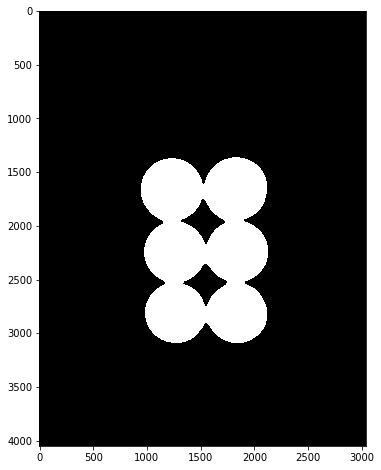

In [22]:
display(thresh,cmap='gray')

### Optional Step 5: Gürültüleri Kaldır

In [23]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

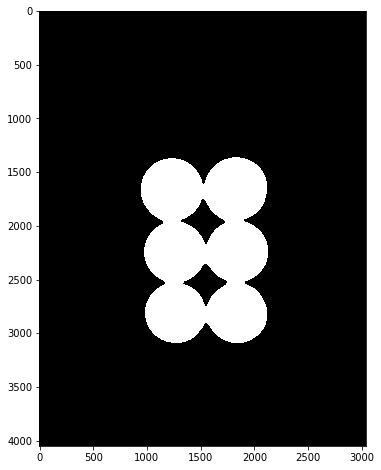

In [24]:
display(opening,cmap='gray')

In [25]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

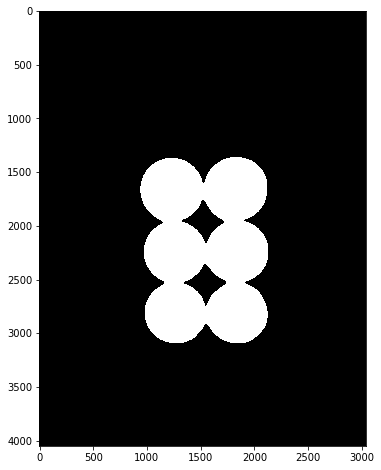

In [26]:
display(sure_bg,cmap='gray')

In [27]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

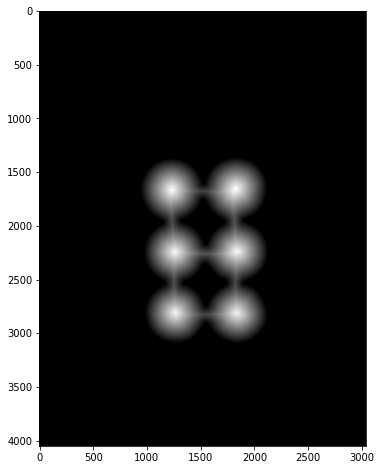

In [28]:
display(dist_transform,cmap='gray')

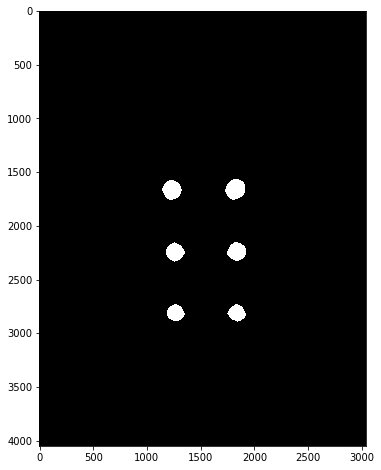

In [29]:
display(sure_fg,cmap='gray')

#### Step 8: Find Unknown Region

In [30]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

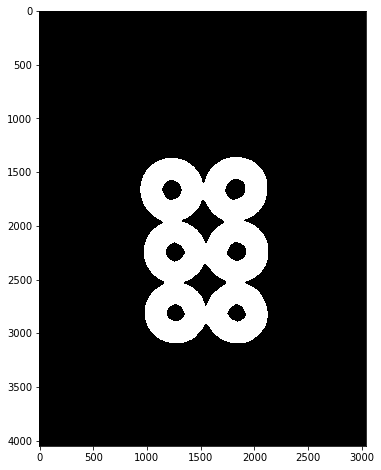

In [31]:
display(unknown,cmap='gray')

#### Step 9: Label Markers of Sure Foreground

In [33]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

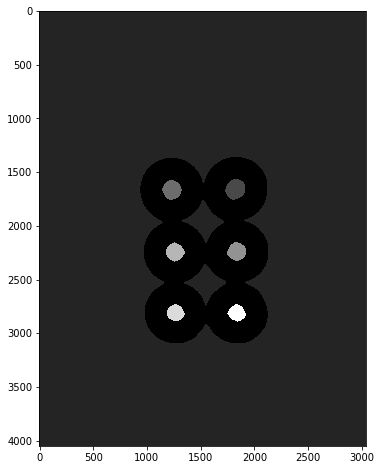

In [34]:
display(markers,cmap='gray')

#### Step 10: Apply Watershed Algorithm to find Markers

In [35]:
markers = cv2.watershed(img,markers)

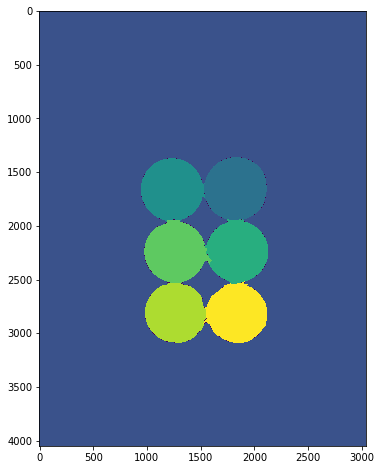

In [36]:
display(markers)

#### Step 11: Find Contours on Markers

In [37]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

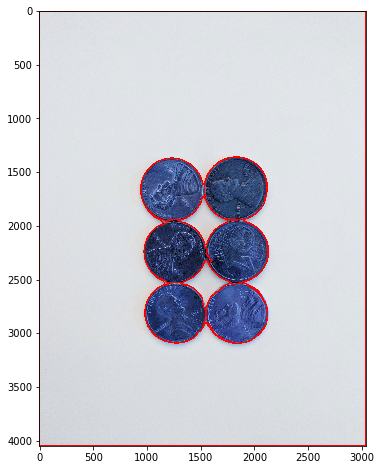

In [38]:
display(sep_coins)